# State Visualisations

In this notebook I explore and visualise churn in relation to state

In [28]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
sns.set_style('darkgrid')
%matplotlib inline

# variable for file path from this directory
to_data = '../../../data/'

# import latest 
df = pd.read_csv(to_data + 'initial_clean_lc', index_col = 0)
df.head()

ImportError: dlopen(/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/fiona/ogrext.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libgif.7.dylib
  Referenced from: /opt/anaconda3/envs/learn-env/lib/libgdal.20.dylib
  Reason: image not found

In [24]:
state_churn = df.groupby(['state'])['churn'].mean()
state_churn.sort_values(ascending = False)

state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
ND    0.096774
NM    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64

ValueError: Could not interpret input 'state'

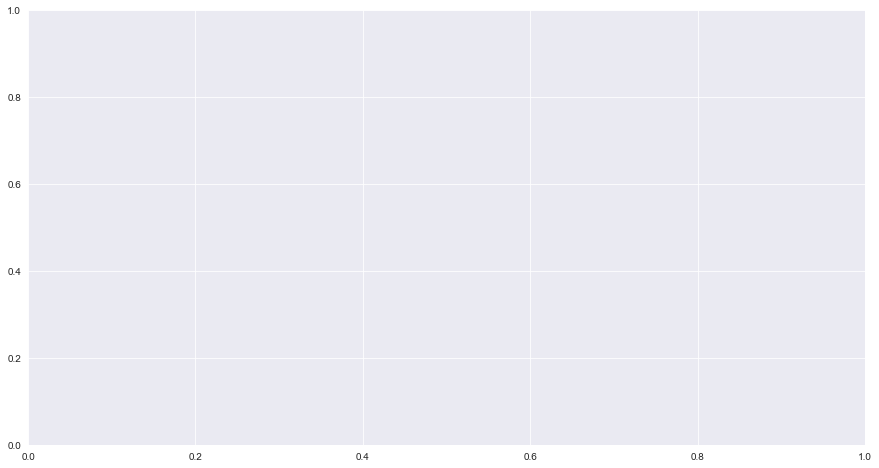

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'state', y = 'churn', data = state_churn, ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('# Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()

In [11]:
df['state'].describe()

count     3333
unique      51
top         WV
freq       106
Name: state, dtype: object

In [16]:
enumerate(df['state'].unique()))

TypeError: 'int' object is not iterable